In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline
import numpy as np
import operator
from matplotlib import pyplot as plt
from repositories.CorpusRepository import *
from repositories.TokenRepository import *
from repositories.EstadisticasRepository import *

path = 'corpus'
corpusRepository = CorpusRepository(path)
tokenRepository = TokenRepository()
pathVacias = None

documentos = corpusRepository.getListDocuments()


In [2]:
response = tokenRepository.tokenizar(documentos,pathVacias = pathVacias)



100% ▏██████████████████████████████████████████████████▏



### Gráfico escala lineal

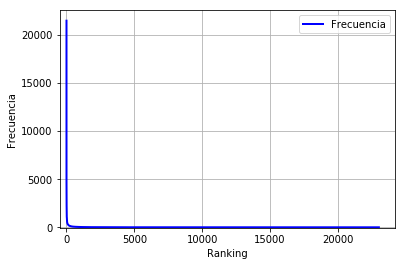

In [21]:
lista = sorted(response['terminos'].items(), key=operator.itemgetter(1) ,reverse=True)
#terminos_rankeados = sorted(tokenizador.terminos.keys(), key=lambda x: (tokenizador.terminos[x]["CF"]), reverse=True)
frecuencias = []
for termino in lista:
    frecuencias.append(termino[1]['CF'])

ranking = xrange(1, len(frecuencias) + 1)
figura, grafico = plt.subplots()
grafico.plot(ranking, frecuencias, color="b", linewidth=2, label="Frecuencia")
grafico.legend(loc="upper right")
grafico.grid(True)
grafico.set_xlabel("Ranking")
grafico.set_ylabel("Frecuencia")
grafico.set_xlim(left=-500)
grafico.set_ylim(bottom=-50)
figura.show()

Como se puede ver en el gráfico, hay una pequeña cantidad de términos con muy alta frecuencia de aparición y una gran cantidad que aparece una sola vez en el corpus.

### Gráfico escala logarítmica.

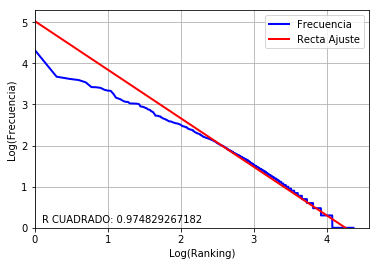

In [10]:
def graficar_frecuencias_log(ranking, frecuencias):
    x_log = np.log10(ranking)
    y_log = np.log10(frecuencias)

    recta_ajuste = np.polyfit(x_log, y_log, 1)
    r_cuadrado = pow(np.corrcoef(x_log, y_log)[0, 1], 2)

    recta_ecuacion = np.poly1d(recta_ajuste)
    recta_evaluada = recta_ecuacion(x_log)

    figura, grafico = plt.subplots()
    grafico.plot(x_log, y_log, color="b", linewidth=2, label="Frecuencia")
    grafico.plot(x_log, recta_evaluada, color="r", linewidth=2, label="Recta Ajuste")
    grafico.legend(loc="upper right")
    grafico.grid(True)
    grafico.set_xlabel("Log(Ranking)")
    grafico.set_ylabel("Log(Frecuencia)")
    grafico.set_xlim(left=0)
    grafico.set_ylim(bottom=0)
    grafico.text(0.1, 0.2, "R CUADRADO: " + str(r_cuadrado), horizontalalignment='left', verticalalignment='center')
    figura.show()
    
graficar_frecuencias_log(ranking, frecuencias)

La recta ajusta de manera bastante precisa en los valores intermedios, pero no predice tan bien los valores extremos, por lo tanto, se realiza la misma prueba podando distintos porcentajes de los términos más y menos frecuentes. Para poder realizar la poda calculo las frecuencias acumuladas.

In [11]:
def podar(frecuencias_absolutas, frecuencias_acumuladas, porcentaje_poda):
    frecuencia_total = sum(frecuencias_absolutas)
    frecuencias_absolutas_podadas = list(frecuencias_absolutas)
    ranking_podado = range(1, len(frecuencias_absolutas_podadas) + 1)
    corte_inferior = porcentaje_poda / float(100)
    corte_superior = 1 - corte_inferior
    for frecuencia_acumulada in frecuencias_acumuladas:
        frecuencias_absolutas_podadas.pop(0)
        ranking_podado.pop(0)
        if frecuencia_acumulada / float(frecuencia_total) >= corte_inferior:
            break
    for frecuencia_acumulada in reversed(frecuencias_acumuladas):
        frecuencias_absolutas_podadas.pop()
        ranking_podado.pop()
        if frecuencia_acumulada / float(frecuencia_total) <= corte_superior:
            break
    return (ranking_podado, frecuencias_absolutas_podadas)

frecuencia_total = sum(frecuencias)
frecuencias_acumuladas = [frecuencias[0]]
for i in xrange(1, len(frecuencias)):
    frecuencias_acumuladas.append(frecuencias[i] + frecuencias_acumuladas[i-1])

### Poda 5%

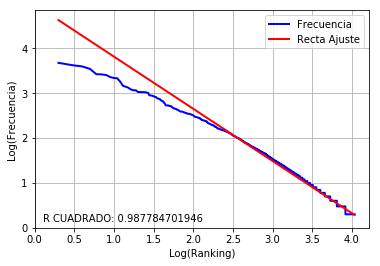

In [13]:
ranking_poda_5, frecuencia_poda_5 = podar(frecuencias, frecuencias_acumuladas, 5)
graficar_frecuencias_log(ranking_poda_5, frecuencia_poda_5)

### Poda 10%

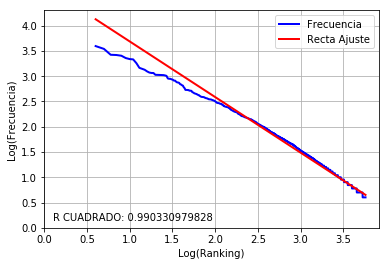

In [14]:
ranking_poda_10, frecuencia_poda_10 = podar(frecuencias, frecuencias_acumuladas, 10)
graficar_frecuencias_log(ranking_poda_10, frecuencia_poda_10)

### Poda 15%

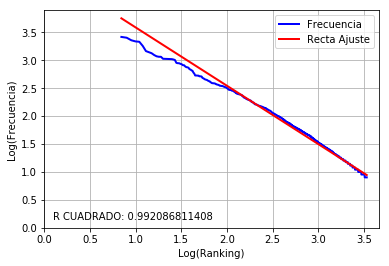

In [16]:
ranking_poda_15, frecuencia_poda_15 = podar(frecuencias, frecuencias_acumuladas, 15)
graficar_frecuencias_log(ranking_poda_15, frecuencia_poda_15)

Comparando los valores del coeficiente de determinación entre los gráficos de las distintas podas, podemos concluir que mientras mayor es el porcentaje de poda, mejor es la predicción, por lo tanto el porcentaje de poda que genera la mejor predicción de este texto es la del 15%.